In [1]:
from pycomplexnet import Network
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
net = Network.from_pandas(
    pd.DataFrame({
        'from':['A','B','C','A','C','C','C','D'],
        'to':  ['B','C','B','C','A','D','E','E']
    })
)

In [11]:
net.node_labels

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

In [12]:
net.toarray()

array([[0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [13]:
import numpy as np

np.array_equal(
            net.toarray(),
            np.array(
                [[0., 0., 1.],
                [1., 0., 0.],
                [1., 0., 0.]]
            )
        )

False

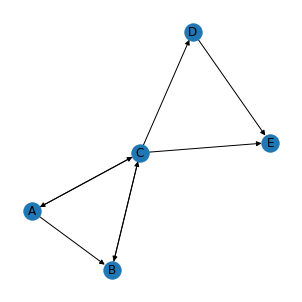

In [14]:
plt.rcParams['figure.figsize'] = (4,4)
G = nx.from_numpy_matrix(net.adjacency_matrix.toarray(), create_using=nx.DiGraph)
pos = nx.spring_layout(G)
# Plot it
nx.draw(G, pos, with_labels=False)
nx.draw_networkx_labels(G, pos, net.node_labels, font_size=12)
plt.show()

In [15]:
net.get_num_triangles(['A','B','C','D','E'])

[1, 1, 1, 0, 0]

In [16]:
net.get_distance('A','D')

2

In [17]:
net.get_num_shortest_paths('A','D')

1